<a href="https://colab.research.google.com/github/nkr9/Data-Analyst/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()

In [ ]:
X = iris['data']
Y = iris['target']

In [ ]:
print("Feature Names:", iris['feature_names'])
print("Target names:", iris['target_names'])
print("\nFirst 5 rows of feature data:\n", X[:5])
print("\nFirst 5 target labels:\n", Y[:5])

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 rows of feature data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First 5 target labels:
 [0 0 0 0 0]


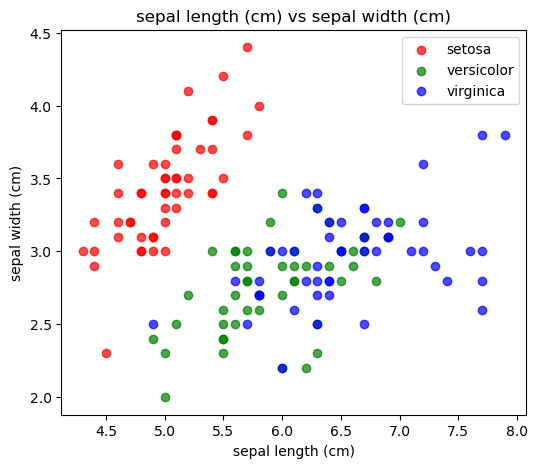

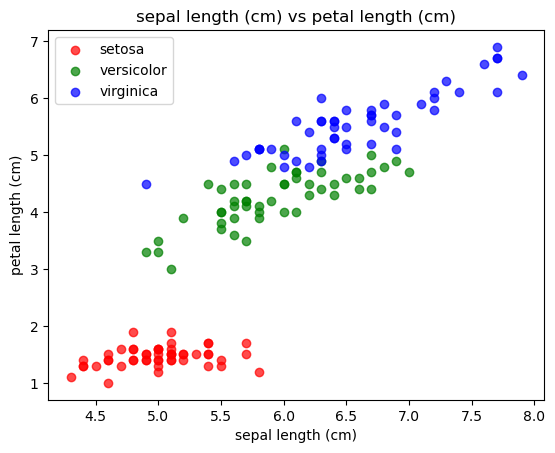

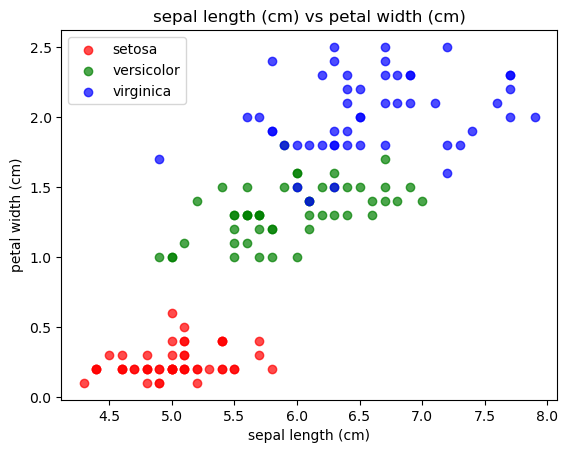

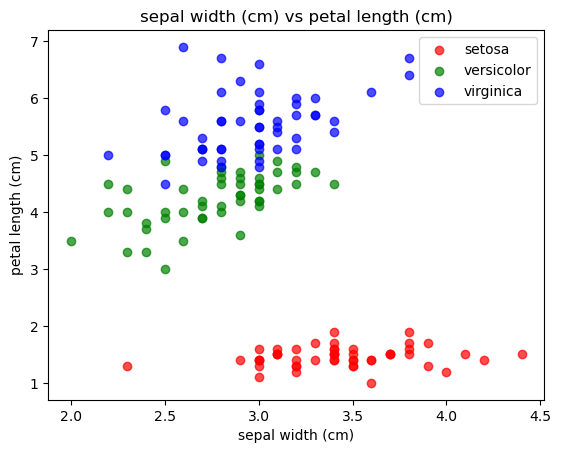

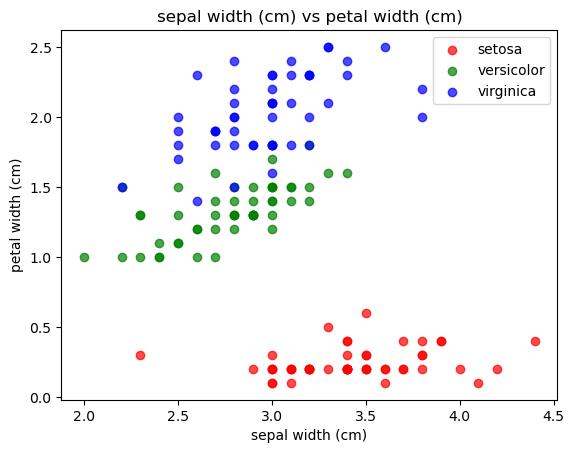

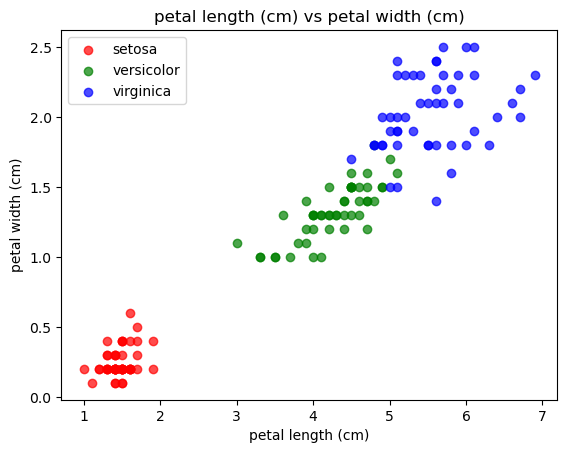

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = iris['feature_names']
target_names = iris['target_names']
colors = ['red', 'green', 'blue']
labels = target_names

combinations = [(0, 1), (0, 2), (0, 3),
                (1, 2), (1, 3), (2, 3)]

plt.figure(figsize=(6, 5))
for i, (x_idx, y_idx) in enumerate(combinations):
    for target in range(3):
        plt.scatter(
            X[Y == target, x_idx],
            X[Y == target, y_idx],
            color=colors[target],
            label=labels[target],
            alpha=0.7
        )
    plt.xlabel(feature_names[x_idx])
    plt.ylabel(feature_names[y_idx])
    plt.title(f'{feature_names[x_idx]} vs {feature_names[y_idx]}')
    plt.legend()
    plt.show()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_standardized, Y, test_size=0.33, random_state=42, stratify=Y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  # max_iter increased for convergence
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print("Training accuracy:", model.score(X_train, Y_train))

Training accuracy: 0.98


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import label_binarize

# Function 1: Calculate Accuracy
def calculate_accuracy(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    print("Accuracy of the Model:", accuracy)

# Function 2: Confusion Matrix
def confusion_matrix_report(y_true, y_pred, target_names):
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Display confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Function 3: Classification Report
def classification_report_func(y_true, y_pred, target_names):
    # Generate the classification report as a dictionary
    class_report_dict = metrics.classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

    # Convert the dictionary to a pandas DataFrame
    class_report_df = pd.DataFrame(class_report_dict).transpose()

    # Display the DataFrame
    print("Classification Report as DataFrame:\n", class_report_df)
    return class_report_df

# Function 4: ROC-AUC Score for Multi-Class
def roc_auc_score_func(y_true, model, X_test, target_names):
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Binarize the true labels for multiclass ROC
    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

    # Compute ROC curve and ROC area for each class
    plt.figure(figsize=(8, 6))

    for i in range(len(target_names)):
        fpr, tpr, _ = metrics.roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{target_names[i]} (AUC = {roc_auc:.2f})")

    # Plot chance line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    # Plot settings
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Return macro-average ROC-AUC
    macro_roc_auc = metrics.roc_auc_score(y_true_bin, y_pred_prob, average='macro', multi_class='ovr')
    print(f"Macro-Averaged ROC-AUC Score: {macro_roc_auc:.2f}")
    return macro_roc_auc

In [ ]:
calculate_accuracy(Y_test, Y_pred)

Accuracy of the Model: 0.92


Confusion Matrix:
 [[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]


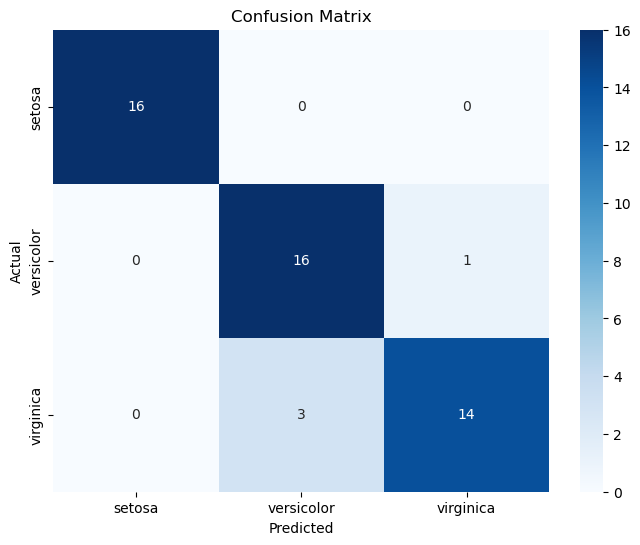

In [ ]:
confusion_matrix_report(Y_test, Y_pred, target_names)

In [ ]:
classification_report_func(Y_test, Y_pred, target_names)

Classification Report as DataFrame:
               precision    recall  f1-score  support
setosa         1.000000  1.000000  1.000000    16.00
versicolor     0.842105  0.941176  0.888889    17.00
virginica      0.933333  0.823529  0.875000    17.00
accuracy       0.920000  0.920000  0.920000     0.92
macro avg      0.925146  0.921569  0.921296    50.00
weighted avg   0.923649  0.920000  0.919722    50.00


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,16.00
versicolor,0.842105,0.941176,0.888889,17.00
virginica,0.933333,0.823529,0.875000,17.00
accuracy,0.920000,0.920000,0.920000,0.92
macro avg,0.925146,0.921569,0.921296,50.00
weighted avg,0.923649,0.920000,0.919722,50.00


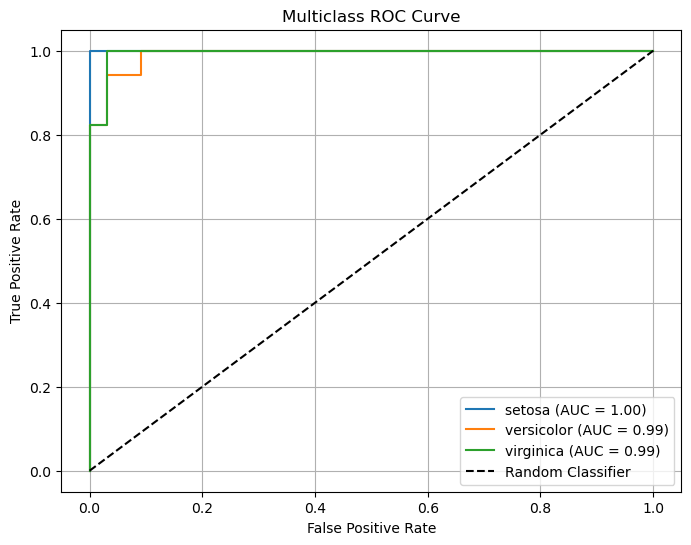

Macro-Averaged ROC-AUC Score: 1.00


0.9952465834818777

In [ ]:
roc_auc_score_func(Y_test, model, X_test, target_names)

In [ ]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, target_names):
    print(f"\n{'='*10} {model_name} {'='*10}")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Accuracy
    calculate_accuracy(y_test, y_pred)

    # Confusion Matrix
    confusion_matrix_report(y_test, y_pred, target_names)

    # Classification Report
    classification_report_df = classification_report_func(y_test, y_pred, target_names)

    # ROC-AUC Curve and Score
    roc_auc_score_func(y_test, model, X_test, target_names)

    return classification_report_df

## KNN model


========== K-Nearest Neighbors ==========
Accuracy of the Model: 0.92
Confusion Matrix:
 [[16  0  0]
 [ 0 17  0]
 [ 0  4 13]]


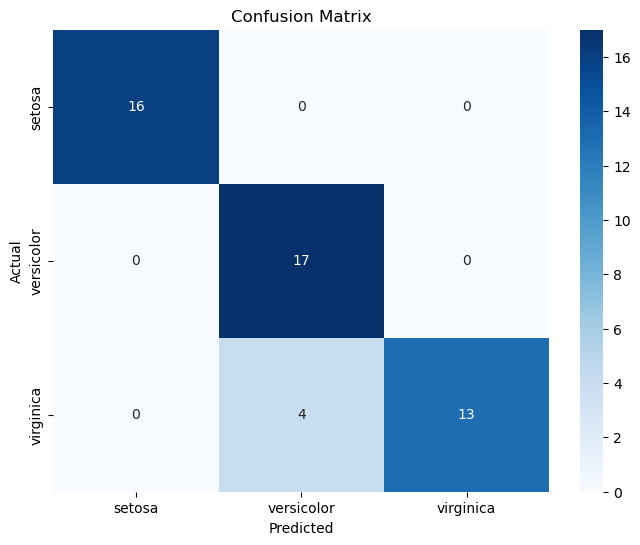

Classification Report as DataFrame:
               precision    recall  f1-score  support
setosa         1.000000  1.000000  1.000000    16.00
versicolor     0.809524  1.000000  0.894737    17.00
virginica      1.000000  0.764706  0.866667    17.00
accuracy       0.920000  0.920000  0.920000     0.92
macro avg      0.936508  0.921569  0.920468    50.00
weighted avg   0.935238  0.920000  0.918877    50.00


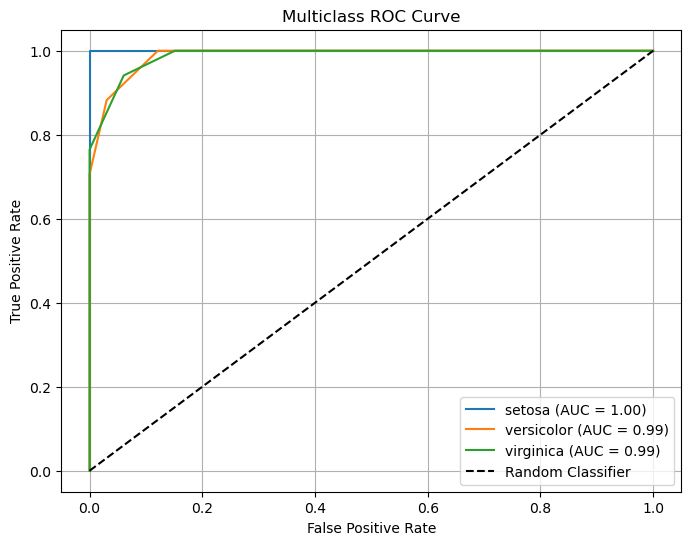

Macro-Averaged ROC-AUC Score: 0.99


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,16.00
versicolor,0.809524,1.000000,0.894737,17.00
virginica,1.000000,0.764706,0.866667,17.00
accuracy,0.920000,0.920000,0.920000,0.92
macro avg,0.936508,0.921569,0.920468,50.00
weighted avg,0.935238,0.920000,0.918877,50.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, "K-Nearest Neighbors", X_train, X_test, Y_train, Y_test, target_names)

## Naive Bayes


========== Naive Bayes ==========
Accuracy of the Model: 0.92
Confusion Matrix:
 [[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]


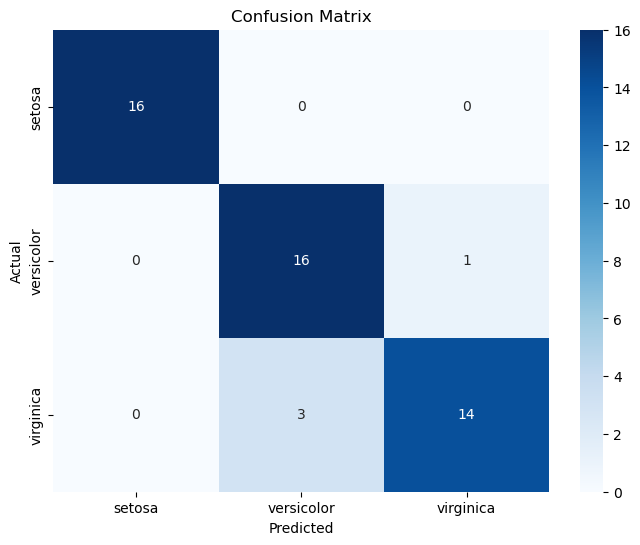

Classification Report as DataFrame:
               precision    recall  f1-score  support
setosa         1.000000  1.000000  1.000000    16.00
versicolor     0.842105  0.941176  0.888889    17.00
virginica      0.933333  0.823529  0.875000    17.00
accuracy       0.920000  0.920000  0.920000     0.92
macro avg      0.925146  0.921569  0.921296    50.00
weighted avg   0.923649  0.920000  0.919722    50.00


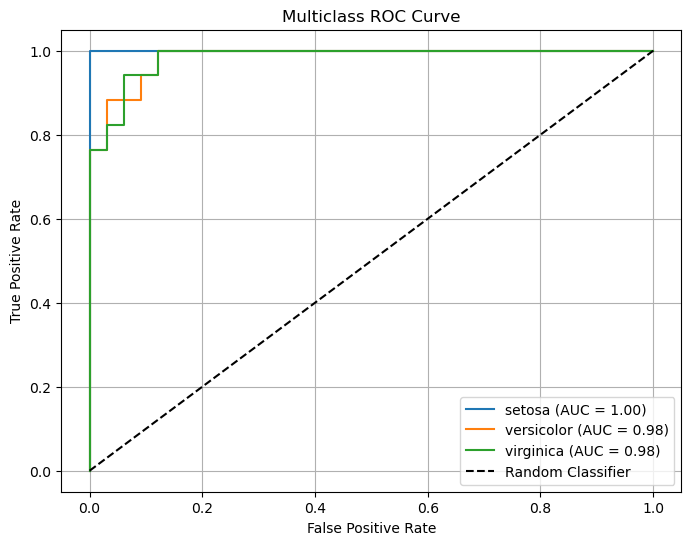

Macro-Averaged ROC-AUC Score: 0.99


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,16.00
versicolor,0.842105,0.941176,0.888889,17.00
virginica,0.933333,0.823529,0.875000,17.00
accuracy,0.920000,0.920000,0.920000,0.92
macro avg,0.925146,0.921569,0.921296,50.00
weighted avg,0.923649,0.920000,0.919722,50.00


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
evaluate_model(nb_model, "Naive Bayes", X_train, X_test, Y_train, Y_test, iris['target_names'])


========== Decision Tree ==========
Accuracy of the Model: 0.94
Confusion Matrix:
 [[16  0  0]
 [ 0 14  3]
 [ 0  0 17]]


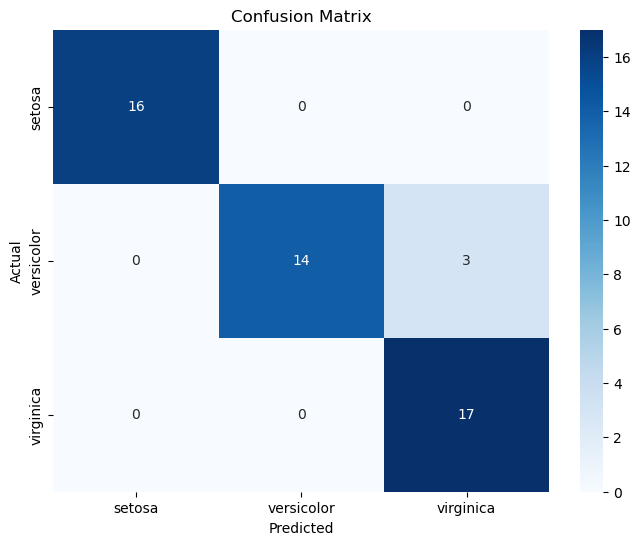

Classification Report as DataFrame:
               precision    recall  f1-score  support
setosa            1.000  1.000000  1.000000    16.00
versicolor        1.000  0.823529  0.903226    17.00
virginica         0.850  1.000000  0.918919    17.00
accuracy          0.940  0.940000  0.940000     0.94
macro avg         0.950  0.941176  0.940715    50.00
weighted avg      0.949  0.940000  0.939529    50.00


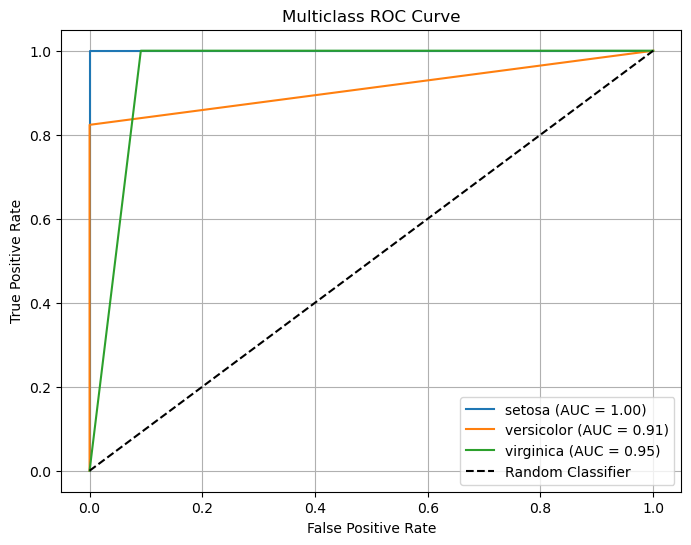

Macro-Averaged ROC-AUC Score: 0.96


,precision,recall,f1-score,support
setosa,1.000,1.000000,1.000000,16.00
versicolor,1.000,0.823529,0.903226,17.00
virginica,0.850,1.000000,0.918919,17.00
accuracy,0.940,0.940000,0.940000,0.94
macro avg,0.950,0.941176,0.940715,50.00
weighted avg,0.949,0.940000,0.939529,50.00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, "Decision Tree", X_train, X_test, Y_train, Y_test, iris['target_names'])


========== Random Forest ==========
Accuracy of the Model: 0.9
Confusion Matrix:
 [[16  0  0]
 [ 0 16  1]
 [ 0  4 13]]


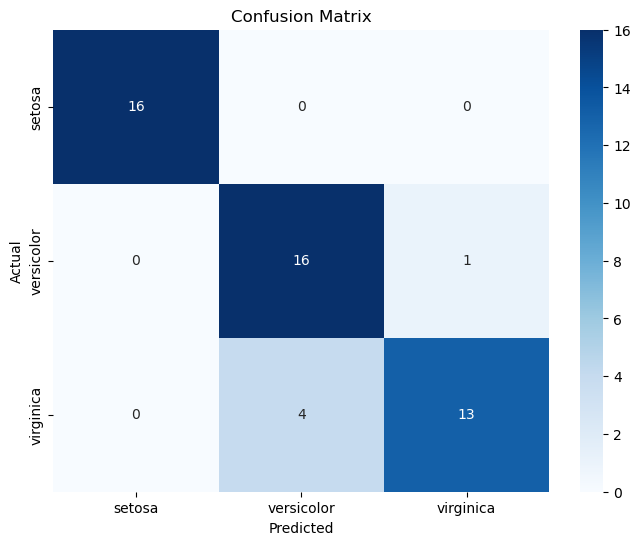

Classification Report as DataFrame:
               precision    recall  f1-score  support
setosa         1.000000  1.000000  1.000000     16.0
versicolor     0.800000  0.941176  0.864865     17.0
virginica      0.928571  0.764706  0.838710     17.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.909524  0.901961  0.901192     50.0
weighted avg   0.907714  0.900000  0.899215     50.0


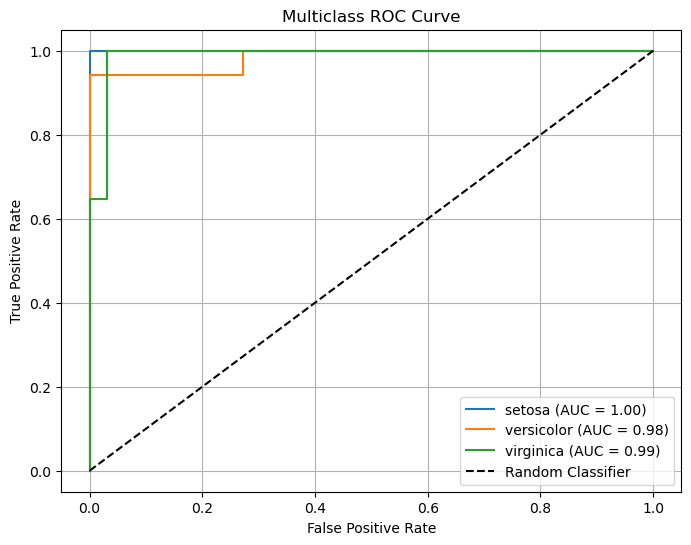

Macro-Averaged ROC-AUC Score: 0.99


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,16.0
versicolor,0.800000,0.941176,0.864865,17.0
virginica,0.928571,0.764706,0.838710,17.0
accuracy,0.900000,0.900000,0.900000,0.9
macro avg,0.909524,0.901961,0.901192,50.0
weighted avg,0.907714,0.900000,0.899215,50.0


In [ ]:
# d. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, "Random Forest", X_train, X_test, Y_train, Y_test, iris['target_names'])


========== Support Vector Classifier ==========
Accuracy of the Model: 0.94
Confusion Matrix:
 [[16  0  0]
 [ 0 16  1]
 [ 0  2 15]]


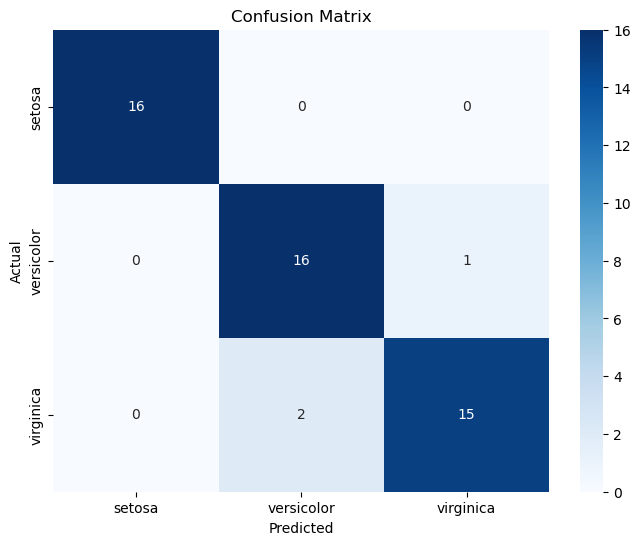

Classification Report as DataFrame:
               precision    recall  f1-score  support
setosa         1.000000  1.000000  1.000000    16.00
versicolor     0.888889  0.941176  0.914286    17.00
virginica      0.937500  0.882353  0.909091    17.00
accuracy       0.940000  0.940000  0.940000     0.94
macro avg      0.942130  0.941176  0.941126    50.00
weighted avg   0.940972  0.940000  0.939948    50.00


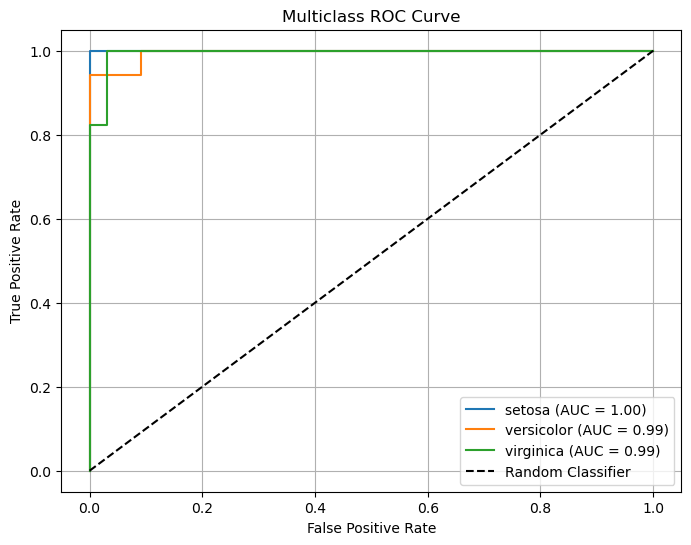

Macro-Averaged ROC-AUC Score: 1.00


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,16.00
versicolor,0.888889,0.941176,0.914286,17.00
virginica,0.937500,0.882353,0.909091,17.00
accuracy,0.940000,0.940000,0.940000,0.94
macro avg,0.942130,0.941176,0.941126,50.00
weighted avg,0.940972,0.940000,0.939948,50.00


In [ ]:
# e. Support Vector Classifier (with probability=True for ROC curve)
from sklearn.svm import SVC

svc_model = SVC(probability=True)
evaluate_model(svc_model, "Support Vector Classifier", X_train, X_test, Y_train, Y_test, iris['target_names'])